# Problem 1 (SVD Theory)

In [210]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [211]:
A = np.array([
        [8, 7,      1, np.NaN, 4],
        [9, 7,      2, 5,      6],
        [1, 4,      9, np.NaN, 3],
        [3, np.NaN, 8, 5,      4],
        [np.NaN, 3, np.NaN, 9, 9],
        [5, 1, 4, 10, np.NaN]
    ])

print(A.shape)
data

(6, 5)


array([[  8.,   7.,   1.,  nan,   4.],
       [  9.,   7.,   2.,   5.,   6.],
       [  1.,   4.,   9.,  nan,   3.],
       [  3.,  nan,   8.,   5.,   4.],
       [ nan,   3.,  nan,   9.,   9.],
       [  5.,   1.,   4.,  10.,  nan]])

$A \in \mathbb{R}^{M \times N}$.

1. $ K = AA^{T}, K \in \mathbb{R}^{M \times M} $ indicates row-row correlations.
2. $ L = A^{T}A, L \in \mathbb{R}^{N \times N}$ indicates column-column correlations.
3. $ A = UDV^{T}, U: (M \times M), D: (M \times N), V^{T}: (N \times N) $; in our case: $ U: (6 \times 6), D: (6 \times 5), V^{T}: (5 \times 5) $
4. Performing SVD on the rating column would help us isolate some latent concepts. It will, for instance, yield a matrix mapping movies to their belonging to a particular type (or genre), as well as one mapping users to their affinities towards certain genres.
5. D contains the singular values $\sigma_{i}$ on its diagonal. It's possible to keep all nonzero singular values, but it's generally more useful to just keep the K largest ones. In our case, we could consider keeping the first three or two.
6. The matrix U can be seen as a description of every movie as a composition of some latent variables.
7. The matrix V can be seen as a description of every user as a composition of some latent variables (e.g. affinities to certain movie genres).

In [212]:
A_imputed = np.nan_to_num(A)
A_imputed[A_imputed == 0] = 5.5
A_imputed

array([[  8. ,   7. ,   1. ,   5.5,   4. ],
       [  9. ,   7. ,   2. ,   5. ,   6. ],
       [  1. ,   4. ,   9. ,   5.5,   3. ],
       [  3. ,   5.5,   8. ,   5. ,   4. ],
       [  5.5,   3. ,   5.5,   9. ,   9. ],
       [  5. ,   1. ,   4. ,  10. ,   5.5]])

In [213]:
def full_svd(matrix):
    U, d, V = np.linalg.svd(matrix, full_matrices=True)
    D = np.zeros(matrix.shape)
    D[:d.shape[0],:d.shape[0]] = np.diag(d)
    return U, D, V

In [214]:
U, D, V = full_svd(A_imputed)

In [215]:
%precision 2
U, D, V.T

(array([[-0.38, -0.51,  0.23, -0.42,  0.6 ,  0.02],
        [-0.43, -0.51,  0.23,  0.26, -0.61, -0.24],
        [-0.33,  0.58,  0.34, -0.19,  0.04, -0.63],
        [-0.37,  0.34,  0.45,  0.06, -0.11,  0.73],
        [-0.5 ,  0.11, -0.43,  0.64,  0.38, -0.04],
        [-0.41,  0.11, -0.63, -0.55, -0.32,  0.13]]),
 array([[ 29.7 ,   0.  ,   0.  ,   0.  ,   0.  ],
        [  0.  ,  10.  ,   0.  ,   0.  ,   0.  ],
        [  0.  ,   0.  ,   7.09,   0.  ,   0.  ],
        [  0.  ,   0.  ,   0.  ,   2.76,   0.  ],
        [  0.  ,   0.  ,   0.  ,   0.  ,   0.68],
        [  0.  ,   0.  ,   0.  ,   0.  ,   0.  ]]),
 array([[-0.44, -0.6 ,  0.02, -0.11, -0.66],
        [-0.37, -0.25,  0.73, -0.07,  0.51],
        [-0.39,  0.74,  0.35,  0.06, -0.41],
        [-0.56,  0.16, -0.5 , -0.56,  0.31],
        [-0.45, -0.04, -0.3 ,  0.81,  0.2 ]]))

In [216]:
reconstruction = np.dot(U, np.dot(D, V))
reconstruction

array([[ 8. ,  7. ,  1. ,  5.5,  4. ],
       [ 9. ,  7. ,  2. ,  5. ,  6. ],
       [ 1. ,  4. ,  9. ,  5.5,  3. ],
       [ 3. ,  5.5,  8. ,  5. ,  4. ],
       [ 5.5,  3. ,  5.5,  9. ,  9. ],
       [ 5. ,  1. ,  4. , 10. ,  5.5]])

In [217]:
np.allclose(A_imputed, reconstruction)

True

In [218]:
def scatter_label(data, labels):
    """Helper function for pretty scatterplots."""
    plt.scatter(data[:, 0], data[:, 1], s=45)
    for label, x, y in zip(labels, data[:, 0], data[:, 1]):
        plt.annotate(
            label, 
            xy = (x, y), xytext = (20, 20),
            textcoords = 'offset points', ha = 'right', va = 'bottom',
            bbox = dict(boxstyle = 'round, pad=0.5', fc = 'cyan', alpha = 0.5),
            arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

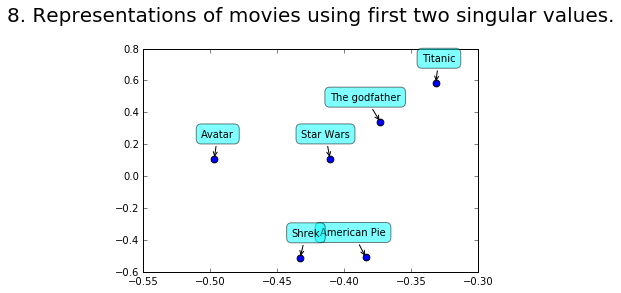

In [219]:
U_2 = U[:,:2]
movie_labels = ['American Pie', 'Shrek', 'Titanic', 'The godfather', 'Avatar', 'Star Wars']
scatter_label(U_2, movie_labels)
    
_ = plt.title("8. Representations of movies using first two singular values.", 
              size=20, y=1.1)

We can interpret the above plot's X axis as a (sort-of) degree of realism, while the Y axis can be seen as a distinction between drama (positive) and comedy (negative).

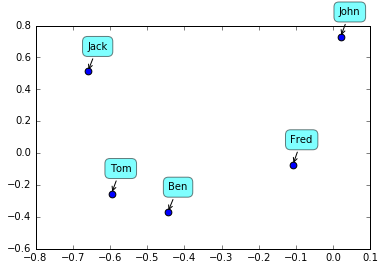

In [220]:
# Idea: analyze massive data and detect cultists who enjoy cult
# classics which some critics consider really bad (e.g. The Room, The Big Lebowski, etc.).
V_2 = V[:,:2]
user_labels = ['Ben', 'Tom', 'John', 'Fred', 'Jack']
scatter_label(V_2, user_labels)

John and Jack prefer more serious movies, while Fred, Tom, and Ben are into comedies. Out of them, Fred seems to be the most well-rounded, but with still quite a strong inclination towards sci-fi.

The second singular value represents the comedy/drama division, while the first one seems to represent the degree of realism.

In [226]:
A_approx = np.dot(U[:,:3], np.dot(D_full[:3,:], V))
print(A_imputed)
print(A_approx)
error = np.linalg.norm(A_approx - A_imputed)
print("Approximation error (frobenius): %f" % error)

[[  8.    7.    1.    5.5   4. ]
 [  9.    7.    2.    5.    6. ]
 [  1.    4.    9.    5.5   3. ]
 [  3.    5.5   8.    5.    4. ]
 [  5.5   3.    5.5   9.    9. ]
 [  5.    1.    4.   10.    5.5]]
[[ 8.14  6.71  1.23  4.72  4.86]
 [ 8.8   7.26  1.79  5.52  5.51]
 [ 0.96  3.95  9.04  5.19  3.43]
 [ 2.97  5.55  7.96  5.12  3.87]
 [ 5.86  3.    5.51  9.91  7.51]
 [ 4.69  1.    4.    9.21  6.79]]
Approximation error (frobenius): 2.841515


## Bob wants to join the system!

In [146]:
Bob = np.array([[1, np.NaN, np.NaN, 6, np.NaN, 10]])
Bob_imputed = np.nan_to_num(Bob)
Bob_imputed[Bob_imputed == 0] = 5.5
Bob_imputed

array([[  1. ,   5.5,   5.5,   6. ,   5.5,  10. ]])

In [149]:
# TODO(andrei) Do this in a prettier way.
A_bob_imputed = np.hstack((A_imputed, Bob_imputed.T))
A_bob_imputed

array([[  8. ,   7. ,   1. ,   5.5,   1. ,   1. ],
       [  9. ,   7. ,   2. ,   5. ,   5.5,   5.5],
       [  1. ,   4. ,   9. ,   5.5,   5.5,   5.5],
       [  3. ,   5.5,   8. ,   5. ,   6. ,   6. ],
       [  5.5,   3. ,   5.5,   9. ,   5.5,   5.5],
       [  5. ,   1. ,   4. ,  10. ,  10. ,  10. ]])

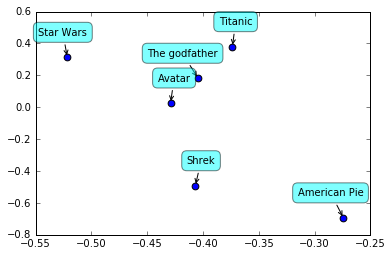

In [150]:
U, D, V = full_svd(A_bob_imputed)
scatter_label(U[:,:2], movie_labels)

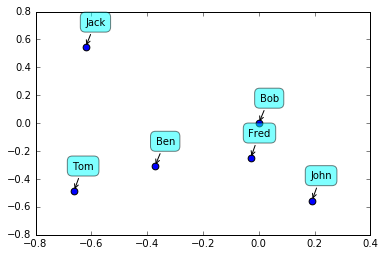

In [194]:
user_labels.append('Bob')
scatter_label(V[:,:2], user_labels)

Bob seems to be close to Fred, in that he also likes more serous movies, but he's even farther than the rest since he absolutely hates comedies such as American Pie.

In [221]:
A_bob_approx = np.dot(U[:,:3], np.dot(D[:3,:], V))
print("Approximate rating matrix including Bob:\n\n", A_bob_approx, "\n")
error_frob = np.linalg.norm(A_approx - A_imputed, ord='fro')
error_euclid = np.linalg.norm(A_approx - A_imputed, ord=2)

print(("Approximation errors after adding Bob to system:\n" +
      "\t- Frobenius norm: %f\n" +
      "\t- Euclidean norm: %f\n") % (error_frob, error_euclid))

Approximate rating matrix including Bob:

 [[ 8.14  6.71  1.23  4.72  4.86]
 [ 8.8   7.26  1.79  5.52  5.51]
 [ 0.96  3.95  9.04  5.19  3.43]
 [ 2.97  5.55  7.96  5.12  3.87]
 [ 5.86  3.    5.51  9.91  7.51]
 [ 4.69  1.    4.    9.21  6.79]] 

Approximation errors after adding Bob to system:
	- Frobenius norm: 2.841515
	- Euclidean norm: 2.759945



We use the highest predicted rating which was missing in Bob's original ratings in order to recommend him a movie.

In [197]:
# Get Bob's rating column!
bob_index = user_labels.index('Bob')
Bob_new_ratings = A_bob_approx[:, bob_index]

# Keep track of the original row indices in the column...
Bob_candidates = np.array([np.arange(Bob.shape[1]), Bob_new_ratings])
# ...and only keep rows for movies Bob didn't see yet.
Bob_candidates = Bob_candidates[:, np.isnan(Bob[0])]

# Pick the row with the highest rating.
best_entry = Bob_candidates[:, np.argmax(Bob_candidates[1,:])]
# And then grab the movie index.
best_index = int(best_entry[0])

print("Bob should watch %s!" % movie_labels[best_index])

Bob should watch Avatar!


In closing, Bob's ratings do affect our prediction system, since they add more information (and also a little bit more confusion, due to a slightly larger approximation error) to our data matrix.